In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = '../trabajos_core/data/retail_sales_dataset.csv'
    df = cargar_datos(ruta_archivo)  

print(df.head())

##Imprime ultimas 5 filas
print("nÚltimas 5 filas del DataFrame:")
print(df.tail(5))
##Imprime informacion del dataframe
print("nInformación del DataFrame:")
print(df.info())
## Imprime estadistica descriptiva del DF
print("nEstadísticas descriptivas del DataFrame:")
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
nÚltimas 5 filas del DataFrame:
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2

## Limpieza del dataset

In [3]:
##Verificacion de elementos duplicados
print("Cantidad de filas duplicadas antes de la eliminacion: ",df.duplicated().sum())
##Verificacion y ajustes de tipos de datos
print("Dtype Original: ", df.dtypes)

# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'Transaction ID': 'int64',
    'Date': 'date',
    'Customer ID': 'string',
    'Gender': 'string',
    'Age': 'int64',
    'Product Category': 'string',
    'Quantity': 'int64',
    'Price per Unit': 'int64', 
    'Total Amount': 'int64'
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'int64':'int64',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}## itera entre los elementos del diccionario y mapea

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Cantidad de filas duplicadas antes de la eliminacion:  0
Dtype Original:  Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object
Diccionario Mapeado para pandas:
{'Transaction ID': 'int64', 'Date': 'datetime64[ns]', 'Customer ID': 'string', 'Gender': 'string', 'Age': 'int64', 'Product Category': 'string', 'Quantity': 'int64', 'Price per Unit': 'int64', 'Total Amount': 'int64'}


In [4]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            # Por ejemplo, 'string' en pandas puede ser 'string[python]'
            # Comparar solo las partes relevantes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Discrepancias encontradas en los tipos de datos:
- Columna 'Date': Tipo actual -> object, Tipo esperado -> datetime64[ns]
- Columna 'Customer ID': Tipo actual -> object, Tipo esperado -> string
- Columna 'Gender': Tipo actual -> object, Tipo esperado -> string
- Columna 'Product Category': Tipo actual -> object, Tipo esperado -> string


In [5]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

print(df.dtypes)


Todos los tipos de datos han sido corregidos correctamente.
Transaction ID               int64
Date                datetime64[ns]
Customer ID         string[python]
Gender              string[python]
Age                          int64
Product Category    string[python]
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [6]:
##Verificar valores nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


##### No se encuentran valores nulos

In [7]:
### Control de valores categoricos
# Lista de columnas categóricas a revisar
categorical_cols = ['Customer ID', 'Gender', 'Product Category']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)


Valores únicos en la columna 'Customer ID':
['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005', 'CUST006', 'CUST007', 'CUST008', 'CUST009', 'CUST010', 'CUST011', 'CUST012', 'CUST013', 'CUST014', 'CUST015', 'CUST016', 'CUST017', 'CUST018', 'CUST019', 'CUST020', 'CUST021', 'CUST022', 'CUST023', 'CUST024', 'CUST025', 'CUST026', 'CUST027', 'CUST028', 'CUST029', 'CUST030', 'CUST031', 'CUST032', 'CUST033', 'CUST034', 'CUST035', 'CUST036', 'CUST037', 'CUST038', 'CUST039', 'CUST040', 'CUST041', 'CUST042', 'CUST043', 'CUST044', 'CUST045', 'CUST046', 'CUST047', 'CUST048', 'CUST049', 'CUST050', 'CUST051', 'CUST052', 'CUST053', 'CUST054', 'CUST055', 'CUST056', 'CUST057', 'CUST058', 'CUST059', 'CUST060', 'CUST061', 'CUST062', 'CUST063', 'CUST064', 'CUST065', 'CUST066', 'CUST067', 'CUST068', 'CUST069', 'CUST070', 'CUST071', 'CUST072', 'CUST073', 'CUST074', 'CUST075', 'CUST076', 'CUST077', 'CUST078', 'CUST079', 'CUST080', 'CUST081', 'CUST082', 'CUST083', 'CUST084', 'CUST085', 'CUST086', 'CUST087

##### No se encuentran inconsistencias en valores categoricos

#### Deteccion de datos anomalos

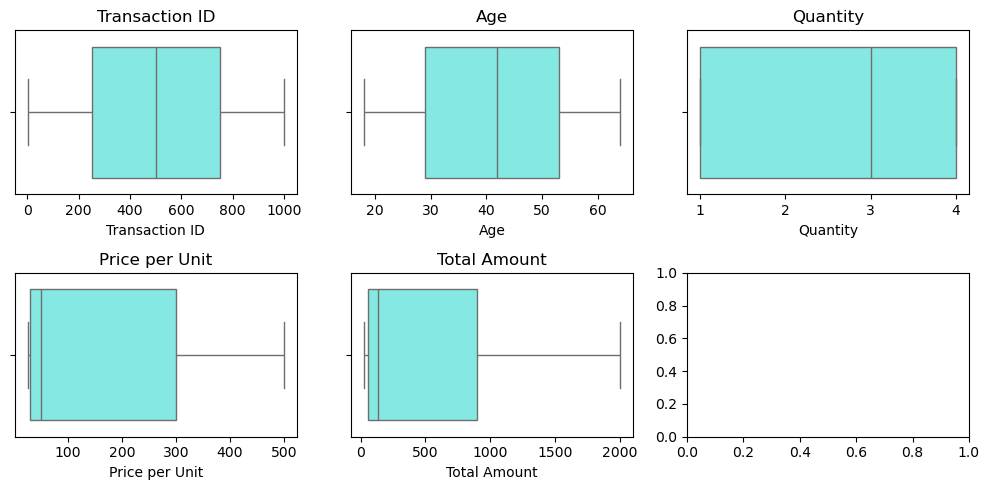

In [8]:
##
## Ploteado de datos anomalos para verificacion de outliers
## Se toman en consideracion las columnas numericas
features_numericos = ['Transaction ID','Age', 'Quantity', 'Price per Unit', 'Total Amount']

def plot_grafico_outliers(features, df):
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.boxplot(x=df[feature], ax=axes[row, col], color="#75f8f2")
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(features_numericos,df)

##### Segun los graficos de boxplot de los datos numericos no se encuentran outliers en los valores numericos

### Analisis descriptivo y visual

   * Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
   * Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
   * Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
   * Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
   * Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.


In [9]:
print('Estadistica descriptiva del dataset')
print(df.describe())

Estadistica descriptiva del dataset
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%   

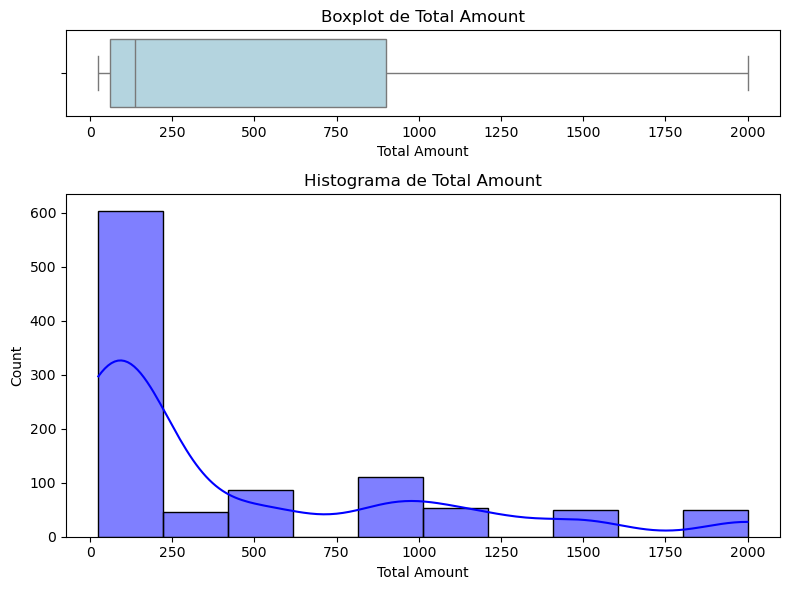

In [10]:
#####EJERCICIO COMBINADO
###Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave
###Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.



# Crear una figura con subplots 1
fig, ax = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 4]})

# Crear el boxplot en el subplot superior
sns.boxplot(x=df['Total Amount'], ax=ax[0], color='lightblue')
ax[0].set_title('Boxplot de Total Amount')

# Crear el histograma en el subplot inferior
sns.histplot(df['Total Amount'], bins=10, kde=True, ax=ax[1], color='blue')
ax[1].set_title('Histograma de Total Amount')

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Para estos dos graficos (boxplot e histograma) se puede observar que la variable numerica clave "Total Amount" cuanta con valores en su mayoria en un monto bajo entre 1 y 200, la dispercion de los dos graficos a la derecha indican que hay variabilidad en los datos. Sin embargo, no se ven datos atipicos en esta muestra. 

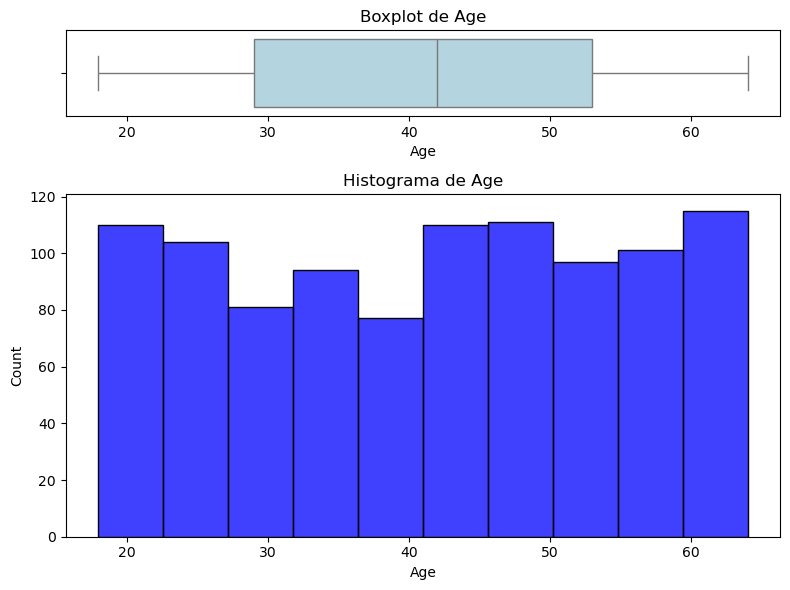

In [11]:
###Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave
# Crear una figura con subplots 2
fig, ax = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 4]})

# Crear el boxplot en el subplot superior
sns.boxplot(x=df['Age'], ax=ax[0], color='lightblue')
ax[0].set_title('Boxplot de Age')

# Crear el histograma en el subplot inferior
sns.histplot(df['Age'], bins=10, kde=False, ax=ax[1], color='blue')
ax[1].set_title('Histograma de Age')

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### La interpretacion de estos dos graficos (boxplot e histograma) sugieren que la mayoria de edad se encuentra entre los 20 y 50 años. La mediana entre los 40s, tambien se puede observar que la distribucion es relativamente uniforme y no se ven datos fuera del rango. 

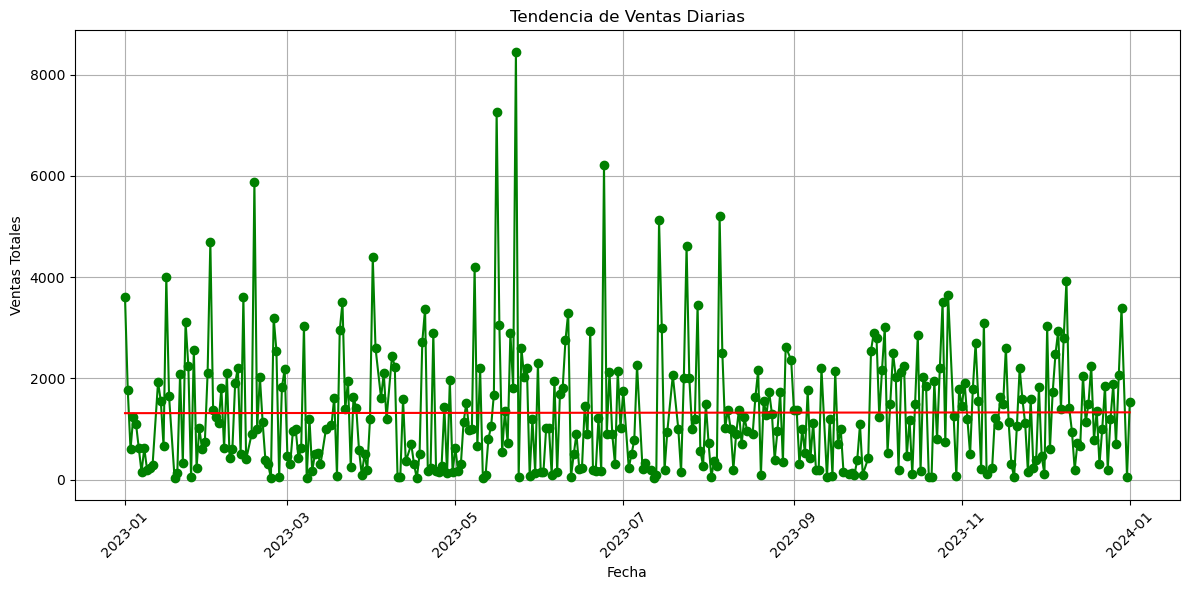

In [12]:
###Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

ventas_diarias = df.groupby('Date')['Total Amount'].sum()
# Calcular la línea de tendencia
x = np.arange(len(ventas_diarias))  # Crear un array de índices
y = ventas_diarias.values  # Valores de ventas
m, b = np.polyfit(x, y, 1)  # Ajuste de mínimos cuadrados (pendiente y ordenada al origen)

##Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ventas_diarias.index, ventas_diarias, marker='o', linestyle='-', color='green')
plt.plot(ventas_diarias.index, m * x + b, color='red', label='Línea de Tendencia')  # Agregar línea de tendencia
plt.title('Tendencia de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

##### Lo que se puede observar en este grafico es que a pesar de las fluctuaciones diarias, las ventas se mantienen relativamente constante a lo largo del tiempo analizado. No se notan tendencias ni para arriba o abajo, lo que indica que hay una venta estable de los productos en este dataset.

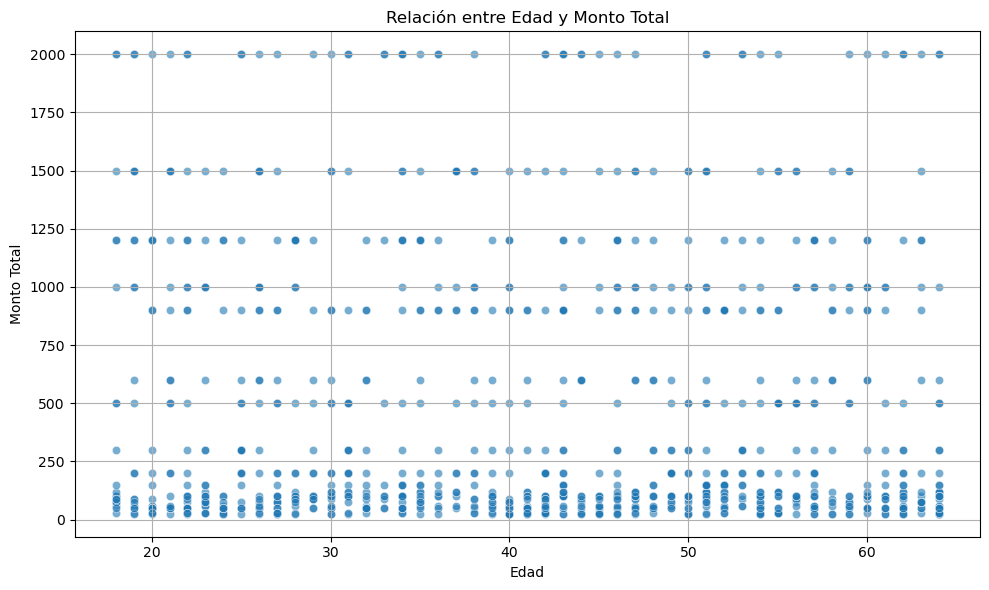

In [13]:
### Utiliza gráficos de dispersión para analizar la relación entre diferentes variables
# Crear un gráfico de dispersión entre Age y Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=df, alpha=0.6)
plt.title('Relación entre Edad y Monto Total')
plt.xlabel('Edad')
plt.ylabel('Monto Total')
plt.grid()
plt.tight_layout()
plt.show()


##### Lo que se puede observar es que no existe una relación lineal clara entre la edad y el monto total. Los puntos se distribuyen de manera aleatoria en el gráfico, sin mostrar una tendencia ascendente o descendente definida a medida que aumenta la edad. Esto significa que la edad de una persona no parece influir significativamente en el monto total que gasta y que hay una alta variabilidad en el monto total.

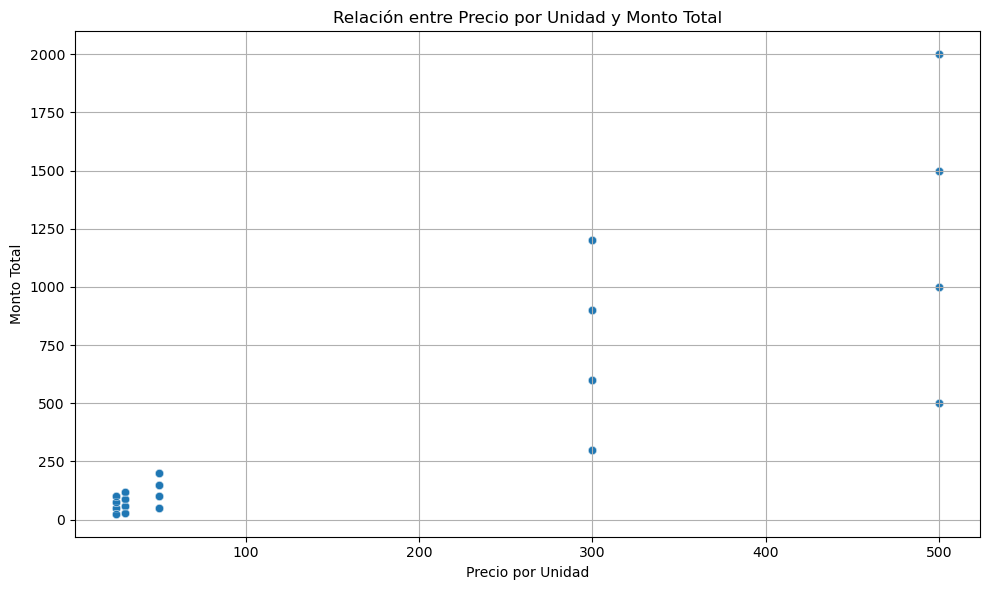

In [14]:
# Crear un gráfico de dispersión entre Price per unit y Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df, alpha=0.6)
plt.title('Relación entre Precio por Unidad y Monto Total')
plt.xlabel('Precio por Unidad')
plt.ylabel('Monto Total')
plt.grid()
plt.tight_layout()
plt.show()

##### En este grafico se puede observar que existe una relación positiva clara entre el precio por unidad y el monto total. Esto significa que a medida que aumenta el precio por unidad, también tiende a aumentar el monto total de la compra. No es una relacion lineal perfecta ya que no todos los puntos se encuentran exactamente sobre una linea recta. Se ve tambien mayor concentracion de puntos a la izquierda lo que suguiere que las ventas se realizan con montos totales bajos comparado al dataset completo.

In [15]:
###Guardar archivo CVS limpio
# Especifica una ruta para guardar el archivo en otro lugar
df.to_csv('../trabajos_core/data/retail_sales_dataset_limpio.csv', index=False)